# Final Project Submission

Please fill out:
* Student name: Nashon Okumu 
* Student pace: Full time Remote
* Scheduled project review date/time: 22/03/2024
* Instructor name: Asha Deen
* Blog post URL:


# Movie Analysis
This project aims at conducting an EDA to advice microsft in creating a new movie studio based on the films that are currently doing the best.

### Business Understanding

As a tech giant, microsfot is seeking to diversify its portfolio by venturing into the movie industry. The company is seeking to leverage its resources and brand to establish a new movie studio. Microsft needs to have thorough analysis and insights that would inform its decision based on the available data.

* OBJECTIVE: The goal of microsft is to establish a new and succesful movie studies producing films with high box office returns and critical acclaim.
* CHALLENGES: Despite microsft's diverse talent pool, it lacks experience on the movie industry including genre trends, audience preferences and factors influencing box office success.
* IMPORTANCE OF EDA: This important to provide insights on the movie industry landscape. It will enable microsoft to gain valuable insight to guides strategic decision making on types of movies to produce as well as target demographics.
* DECISION SUPPORT: The findings from EDA will help inform Microsoft's decisin on head of new movies studies, talent acquisition, resource allocation and content creation.
* LONG-TERM VISION: Microsft's venture into the movie industry shows a long-term potential investement. It is important to have insights on the market dynamics and consumer preferences to establish a sustainable and successful movie studio

In [66]:
#importing necessary libararies
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Understanding and Data Preparation

In [49]:
#Loading Data
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz') #bom dataset
imdb = sqlite3.connect('zippedData/im.db/im.db')       #imdb dataset
tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz') #The numbers dataset

#### Bom Movie Gross Data

In [5]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
bom.shape

(3387, 5)

In [6]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [12]:
#missing values
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [14]:
#duplicates
bom.duplicated().sum()

0

In [17]:
#drop missing values in studio
bom.dropna(subset = ['studio'], axis = 0, inplace = True)
#checking again if they are dropped
bom.isna().sum()

title                0
studio               0
domestic_gross      26
foreign_gross     1349
year                 0
dtype: int64

In [19]:
#drop missing values in domestic gross
bom.dropna(subset = ['domestic_gross'], axis = 0, inplace = True )
#checking again if they are dropped
bom.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

In [21]:
#drop missing values in domestic gross
bom.dropna(subset = ['foreign_gross'], axis = 0, inplace = True )
#checking again if they are dropped
bom.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [26]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,1970-01-01 00:00:00.000002010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,1970-01-01 00:00:00.000002010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,1970-01-01 00:00:00.000002010
3,Inception,WB,292600000.0,535700000,1970-01-01 00:00:00.000002010
4,Shrek Forever After,P/DW,238700000.0,513900000,1970-01-01 00:00:00.000002010


#### IMDB Data

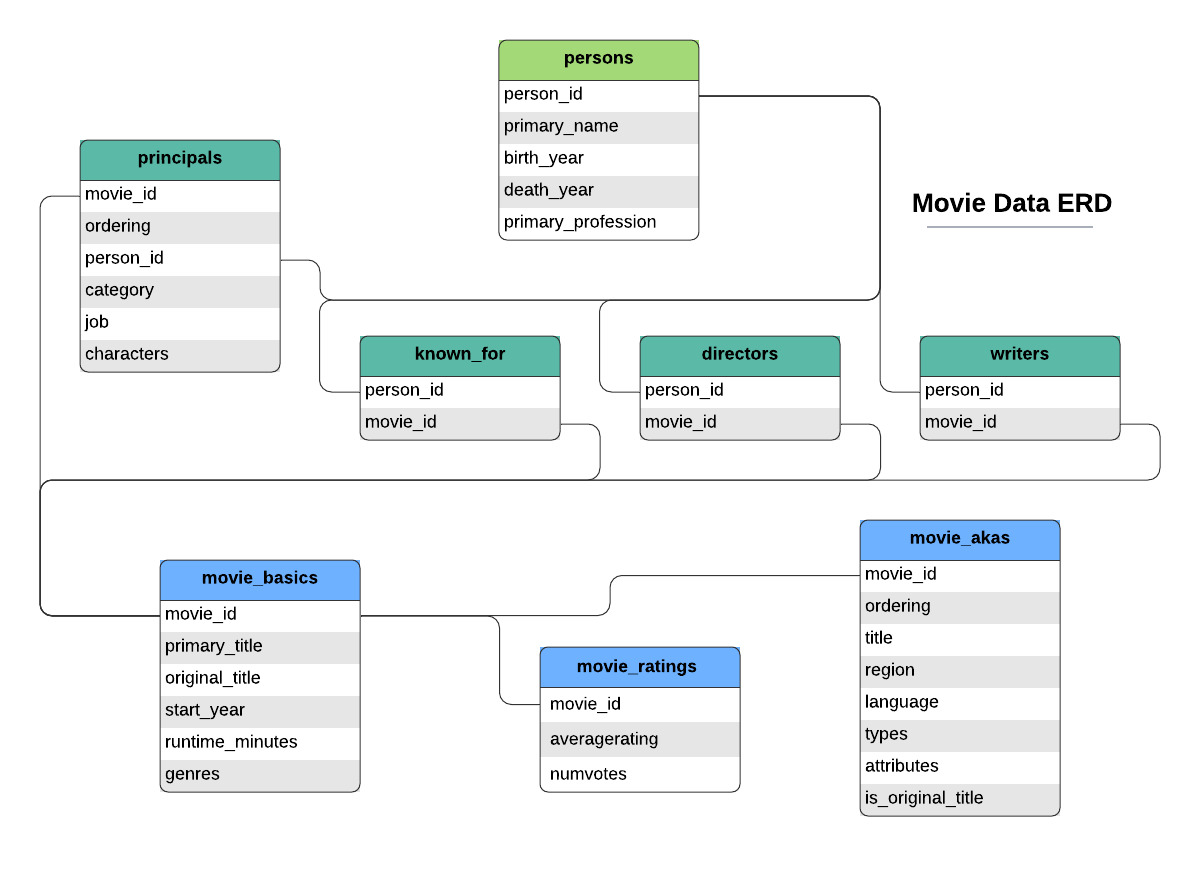

In [10]:
#Selecting all columns from movie_ratings table
q1 = """
SELECT * FROM movie_ratings;
"""
pd.read_sql(q1, imdb)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [9]:
#selecting all columns from movie_basics
q2 = """SELECT * FROM movie_basics;
"""
pd.read_sql(q2, imdb)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [92]:
#join movie_basics and movie-ratings table
q3 = pd.read_sql("""SELECT primary_title, start_year, genres, averagerating, numvotes
FROM movie_basics 
JOIN movie_ratings
ON movie_basics.movie_id = movie_ratings.movie_id 
WHERE numvotes > 1000000 AND averagerating >= 7.0
ORDER BY averagerating DESC
LIMIT 50;""", imdb)

# q3 = pd.read_sql("""SELECT primary_title, start_year, genres, averagerating, numvotes
# FROM movie_basics 
# JOIN movie_ratings
#     USING(movie_id);""", imdb)
# q3



q3

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
2,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
3,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358
5,Shutter Island,2010,"Mystery,Thriller",8.1,1005960
6,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655


In [93]:
q3['genres'].count()

7

In [94]:
q3['genres'].nunique()

6

In [95]:
grouped = q3.groupby('genres')
grouped.get_group('Action,Adventure,Sci-Fi')

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
6,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655


In [96]:
genres_mean = pd.DataFrame(q3.groupby("genres")["numvotes"].mean()).sort_values(by="numvotes", ascending= False)
genres_mean

,numvotes
genres,
"Action,Adventure,Sci-Fi",1512360.5
"Action,Thriller",1387769.0
"Adventure,Drama,Sci-Fi",1299334.0
"Drama,Western",1211405.0
"Biography,Crime,Drama",1035358.0
"Mystery,Thriller",1005960.0


### The Numbers Dataset

In [50]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [51]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [52]:
tn.shape

(5782, 6)

In [24]:
#checking for missing values
tn.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [57]:
#no missing values hence we remove the characters($) in production_budget,domestic_gross and worlwide_gross columns
columns=['production_budget','domestic_gross','worldwide_gross']
for column in columns:
    tn[column]=tn[column].str.replace('[$,]', '')
    

tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [59]:
#converting the Numerical values to type int
columns=['production_budget','domestic_gross','worldwide_gross']
for column in columns:
    tn[column]=tn[column].astype(float)
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [60]:
#checking for duplicates
tn.duplicated().any()

False

In [61]:
tn.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


### Data Analysis

#### Studio Vs. Domestic Gross
This Analysis aims at confirming the studios that are doing the best to produce better films. It also predicts the studio that will be the main competitor for Miscrosoft by finding the top 10 best studios.

In [34]:
#grouping the data
bom_grouped = bom.groupby('studio')["domestic_gross"].mean()
bom_grouped

studio
3D       6.100000e+06
A23      8.210000e+04
A24      6.616208e+06
ADC      1.241000e+05
AF       3.571500e+05
             ...     
XL       2.290000e+05
YFG      1.100000e+06
Yash     2.433185e+06
Zee      1.100000e+06
Zeit.    3.539688e+05
Name: domestic_gross, Length: 257, dtype: float64

In [35]:
#organizing in data frame
grouped = pd.DataFrame(bom_grouped)
grouped

,domestic_gross
studio,
3D,6.100000e+06
A23,8.210000e+04
A24,6.616208e+06
ADC,1.241000e+05
AF,3.571500e+05
...,...
XL,2.290000e+05
YFG,1.100000e+06
Yash,2.433185e+06


In [37]:
#sorting our grouped data
movies = grouped.sort_values(by = ["domestic_gross"], ascending = False )
movies 

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
...,...
Shout!,2.800000e+03
Synergetic,2.400000e+03
DR,8.000000e+02


In [39]:
#top 5 studios
top = movies.head(10)
top

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
Fox,8.051103e+07
Sony,7.761177e+07
Par.,7.609773e+07
MGM,6.666667e+07


In [75]:
#from histogram in visualization, the data is skewed so we divide to ranks
bins=[0,17000000,45000000,np.inf]
rank=['Budget-friendly','Mid-range','Expensive']

tn['production_tier'] = pd.cut(tn['production_budget'], bins, labels=rank)
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_tier,domestic_ROI,worldwide_ROI,ROI%,profit/loss
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,Expensive,335507625.0,335507625.0,78.942971,Profit
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Expensive,-169536125.0,-169536125.0,-41.289850,Loss
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Expensive,-307237650.0,-307237650.0,-87.782186,Loss
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,Expensive,128405868.0,128405868.0,38.840250,Profit
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,Expensive,303181382.0,303181382.0,95.640815,Profit


In [76]:
#Introducing new features
tn['domestic_ROI']=tn.apply(lambda x: 
                               (x.domestic_gross-x.production_budget), axis=1)

tn['worldwide_ROI']=tn.apply(lambda x: 
                               (x.domestic_gross-x.production_budget), axis=1)


tn['ROI%']=tn.apply(lambda x: 
                               (x.worldwide_ROI/x.production_budget)*100, axis=1)
# Profitability
def condition(x):
    if x>=0:
        return "Profit"
    else:
        return 'Loss'
tn['profit/loss']=tn['worldwide_ROI'].apply(condition)
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_tier,domestic_ROI,worldwide_ROI,ROI%,profit/loss
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,Expensive,335507625.0,335507625.0,78.942971,Profit
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Expensive,-169536125.0,-169536125.0,-41.289850,Loss
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Expensive,-307237650.0,-307237650.0,-87.782186,Loss
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,Expensive,128405868.0,128405868.0,38.840250,Profit
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,Expensive,303181382.0,303181382.0,95.640815,Profit


### Data Visualization

#### Top 10 Studios

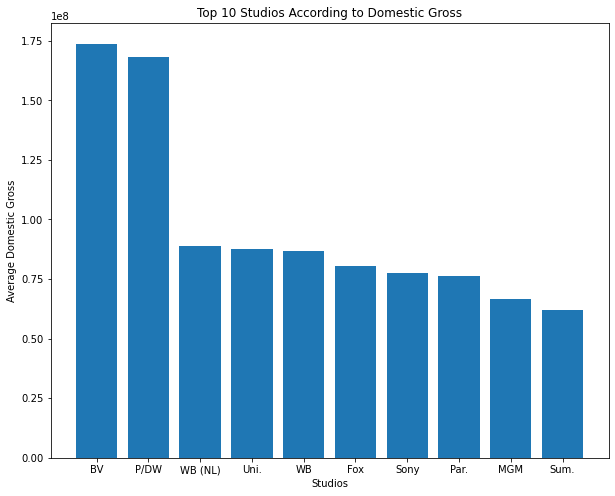

In [43]:
#Bar using bom top 10
plt.figure(figsize = (10, 8))
plt.bar(top['domestic_gross'].index, top['domestic_gross'])
plt.xlabel('Studios')
plt.ylabel('Average Domestic Gross')
plt.title('Top 10 Studios According to Domestic Gross')
plt.show()

### Distribution of Production Budget

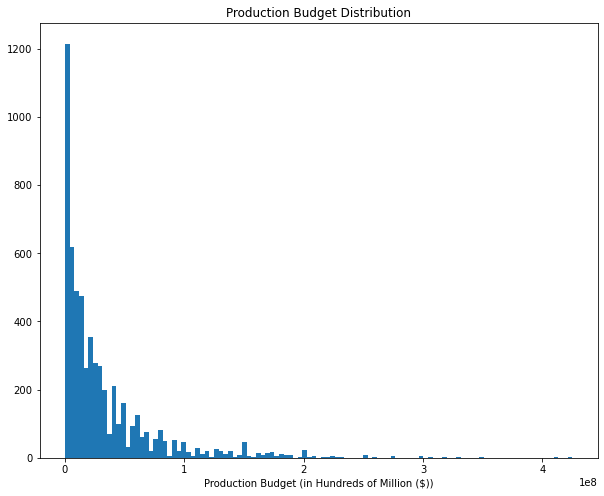

In [63]:
#Using the numbers dataset
plt.figure(figsize = (10, 8))
plt.title('Production Budget Distribution')
plt.xlabel('Production Budget (in Hundreds of Million ($))')
plt.hist(tn['production_budget'],bins='auto')
plt.show()

#### Movies with highest returns on Investment


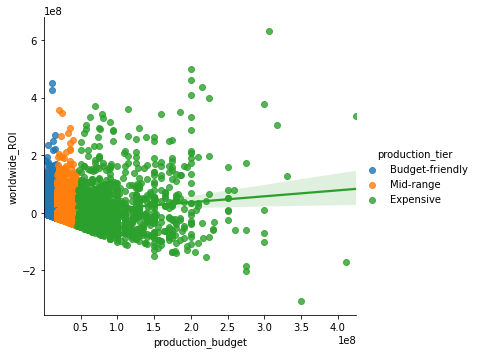

In [83]:
# Relationship of production budget and worldwide ROI
sns.lmplot(data=tn, x='production_budget',y='worldwide_ROI',hue='production_tier');

When the production budget is high, the ROI also is high hence making losses increases exponentially

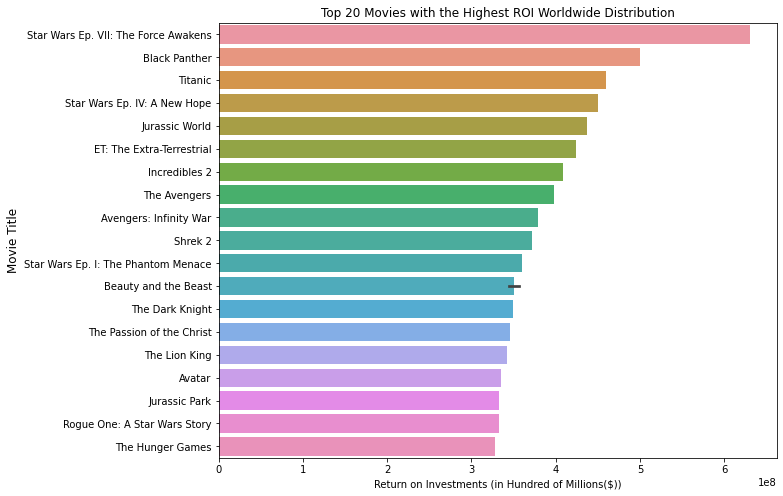

In [86]:
#movies with the highest profits in the world
movies_hROI = tn.sort_values(by=['worldwide_ROI'], ascending=False)
movies_hROI.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(10,8))

title = movies_hROI['movie'][0:20]
ROI = movies_hROI['domestic_ROI'][0:20]

ax=sns.barplot(data=movies_hROI,x=ROI,y=title)

ax.set_title('Top 20 Movies with the Highest ROI Worldwide Distribution')
ax.set_ylabel('Movie Title',fontsize=12)
ax.set_xlabel('Return on Investments (in Hundred of Millions($))');

#### Genre Vs. NumVotes
This cheks the genre with the most vote. This shows the most streamed movies

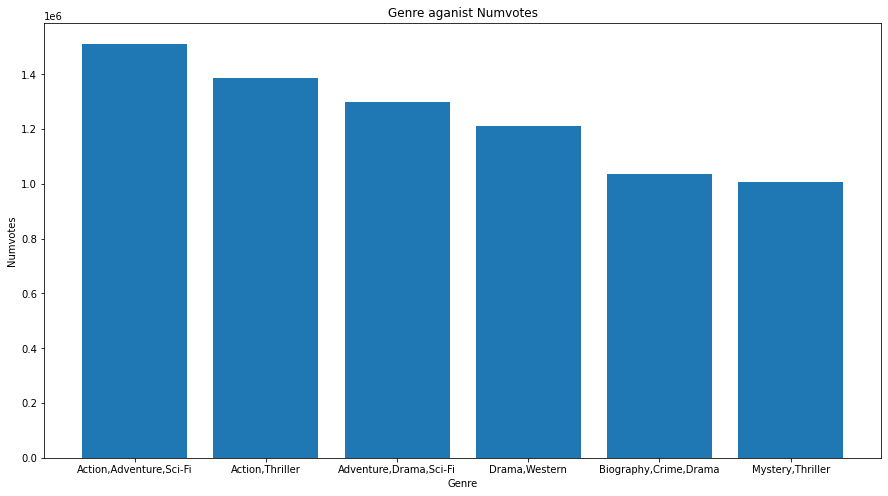

In [100]:
plt.figure(figsize=(15, 8))
y = genres_mean["numvotes"]
plt.bar(y.index, y.values)
plt.xlabel("Genre")
plt.ylabel("Numvotes")
plt.title("Genre aganist Numvotes")
plt.show()

### Conclusion